# Car Classification Model Training

This notebook trains a Hybrid ResNet-ViT model for Indonesian car classification using the collected dataset. The model combines ResNet-50 as a feature extractor with a Vision Transformer for classification.

## Dataset Structure
- **Classes**: 8 Indonesian car types (hatchback, mpv, offroad, pickup, sedan, suv, truck, van)
- **Architecture**: Hybrid ResNet-ViT combining CNN and Transformer
- **Training Strategy**: Transfer learning with data augmentation
- **Class Imbalance**: Handled using weighted loss function for better minority class performance

## Training Process
1. Dataset exploration and class imbalance analysis
2. Model training with weighted loss and comprehensive tracking
3. Performance analysis with detailed charts and metrics
4. Model evaluation with per-class analysis and confusion matrix
5. Training insights and recommendations for optimization

In [ ]:
!rm -rf /kaggle/working
!git clone https://github.com/luthfiarifin/Hybrid-RViT-Car-Retrieval.git code
!mv code/* .
!ls

In [1]:
# Import required libraries
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import os
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

# Set style for plots
plt.style.use("default")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 10

print("Libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    print(
        f"CUDA memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB"
    )

Libraries imported successfully!
PyTorch version: 2.7.1
CUDA available: False



=== Initializing Trainer with Class Imbalance Handling & Early Stopping ===
Using device: cpu
Logging to TensorBoard: logs/train_classification/run_1750620885
Using weighted CrossEntropyLoss with weights: tensor([0.8700, 1.2378, 0.6752, 1.1956, 0.8212, 0.6525, 2.8079, 1.6157])
Using weighted CrossEntropyLoss with weights: tensor([0.8700, 1.2378, 0.6752, 1.1956, 0.8212, 0.6525, 2.8079, 1.6157])

📊 Class Distribution Analysis:
Class        Count    Percentage Imbalance Ratio
--------------------------------------------------
city_car     2056     14.4      % 1.33           x
hatchback    1445     10.1      % 1.90           x
mpv          2649     18.5      % 1.03           x
pickup       1496     10.5      % 1.83           x
sedan        2178     15.2      % 1.26           x
suv          2741     19.2      % 1.00           x
truck        637      4.5       % 4.30           x
van          1107     7.7       % 2.48           x

📈 Imbalance Factor: 4.30x (Most frequent / Least frequent)
⚠️

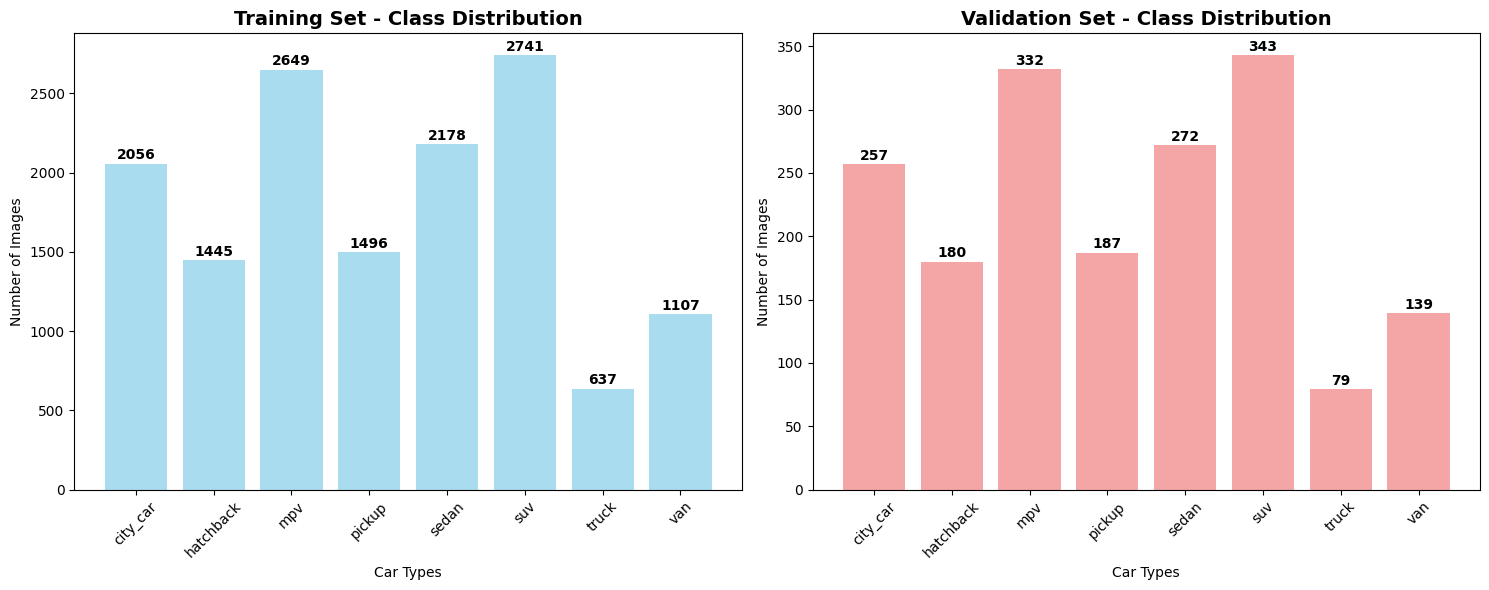


=== Dataset Summary ===
    Class  Training  Validation  Total  Train_Ratio
 city_car      2056         257   2313        0.889
hatchback      1445         180   1625        0.889
      mpv      2649         332   2981        0.889
   pickup      1496         187   1683        0.889
    sedan      2178         272   2450        0.889
      suv      2741         343   3084        0.889
    truck       637          79    716        0.890
      van      1107         139   1246        0.888


In [2]:
# Training configuration

from models.classification.train_classification import CarClassifierTrainer

CONFIG = {
    "train_dir": "data_processing/data/dataset/train",
    "val_dir": "data_processing/data/dataset/val",
    "num_classes": 8,
    "embed_dim": 768,
    "num_heads": 12,
    "num_layers": 6,
    "dropout": 0.1,
    "learning_rate": 1e-4,
    "batch_size": 64,
    "num_epochs": 25,
    "result_path": f'models/results/carvit_model_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pth',
    "use_weighted_loss": True,
    "use_class_balancing": False,
    "num_workers": 8,
    "early_stopping_patience": 7,
    "early_stopping_delta": 0.001,
    "early_stopping_verbose": True,
}

# Initialize the trainer with class imbalance handling and early stopping
print("\n=== Initializing Trainer with Class Imbalance Handling & Early Stopping ===")
trainer = CarClassifierTrainer(
    train_dir=CONFIG["train_dir"],
    val_dir=CONFIG["val_dir"],
    num_classes=CONFIG["num_classes"],
    embed_dim=CONFIG["embed_dim"],
    num_heads=CONFIG["num_heads"],
    num_layers=CONFIG["num_layers"],
    dropout=CONFIG["dropout"],
    learning_rate=CONFIG["learning_rate"],
    batch_size=CONFIG["batch_size"],
    num_epochs=CONFIG["num_epochs"],
    result_path=CONFIG["result_path"],
    use_weighted_loss=CONFIG["use_weighted_loss"],
    use_class_balancing=CONFIG["use_class_balancing"],
    num_workers=CONFIG["num_workers"],
    early_stopping_patience=CONFIG["early_stopping_patience"],
    early_stopping_delta=CONFIG["early_stopping_delta"],
    early_stopping_verbose=CONFIG["early_stopping_verbose"],
)

print("Trainer initialized successfully!")
print(f"Training samples: {len(trainer.train_dataset)}")
print(f"Validation samples: {len(trainer.val_dataset)}")
print(f"Number of batches per epoch: {len(trainer.train_loader)}")
print(f"Class names: {trainer.train_dataset.classes}")

from models.classification.training_report import TrainingReport

# Create a training report instance
report = TrainingReport(trainer, CONFIG, None)

# Generate and summary report
report.dataset_summary_report()

In [3]:
# Start training with detailed tracking
start_time = time.time()

# Execute training
training_results = trainer.train()

# Print training results
total_time = time.time() - start_time
print(f"\n=== Training Completed in {total_time:.2f} seconds ===")

Starting training with detailed tracking and early stopping...
Early Stopping - Patience: 7, Delta: 0.001
Model parameters: 143,116,360
Trainable parameters: 143,116,360

Epoch 1/25


  0%|          | 1/224 [00:34<2:08:02, 34.45s/it, loss=2.24]



KeyboardInterrupt: 

In [ ]:
# Generate the full report
report.full_report()